# Libraries

In [334]:
#Basic Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from datetime import datetime

#Model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from warnings import filterwarnings


filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# A. EDA



1. Customer’s ID: the customer’s ID
2. Gender: gender of the individual.
3. Birth Date: the birth date of the individual
4. Married: whether the customer is married or not (yes/no)
5. Dependents: whether the customer has dependents or not (yes/no
6. Number of Dependents: the number of the customer’s dependents
7. Country: the customer’s current country
8. City: the city where the customer is currently residing in
9. Number of Referrals: the number of referrals made by the customer
10. Tenure in Months: the total duration of the customer being the company’s customer (months)
11. Avg Monthly Long Distance Charges: the average monthly charges for long distance communications
(USD)
12. Internet Service: whether the customer uses the company’s internet service
13. Internet Type: the customer’s current internet service type
14. Avg Monthly GB Download: the average data usage for download by the customer (GB)
15. Premium Tech Support: whether the customer subscribes to premium tech support
16. Streaming Movies: whether the customer subscribes to movie streaming services
17. Streaming Music: whether the customer subscribes to music streaming services
18. Contract: the type of contract by duration
19. Paperless Billing: whether the customer selects paperless billing
20. Payment Method: the customer’s usual payment method
21. Monthly Charge: average monthly charge for the customer
22. Total Refunds: total refunds given to the customer
23. Satisfaction Score: the satisfaction score given by the customer


In [335]:
df = pd.read_csv('2B.tsv', sep = '\t')
df.head()

,Customer ID,Gender,Birth Date,Married,Dependents,Number of Dependents,Country,City,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Service,Internet Type,Avg Monthly GB Download,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score
0,8779-QRDMV,Male,1946/07/17,No,No,0,United States,Los Angeles,0,1,0.00,Yes,DSL,8,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,0.00,3
1,7495-OOKFY,Female,1950/11/12,Yes,Yes,1,United States,Los Angeles,1,8,48.85,Yes,Fiber Optic,17,No,No,No,Month-to-Month,Yes,Credit Card,80.65,0.00,3
2,1658-BYGOY,Male,1953/03/21,No,Yes,3,United States,Los Angeles,0,18,11.33,Yes,Fiber Optic,52,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,45.61,2
3,4598-XLKNJ,Female,1946/03/08,Yes,Yes,1,United States,Inglewood,1,25,19.76,Yes,Fiber Optic,12,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.50,13.43,2
4,4846-WHAFZ,Female,1944/04/02,Yes,Yes,1,United States,Whittier,1,37,6.33,Yes,Fiber Optic,14,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,0.00,2


## Checking Data Anomalies

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Birth Date                         7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Country                            7043 non-null   object 
 7   City                               7043 non-null   object 
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Internet Service                   7043 non-null   objec

In [337]:
df[df.duplicated()].any()

,0
Customer ID,False
Gender,False
Birth Date,False
Married,False
Dependents,False
Number of Dependents,False
Country,False
City,False
Number of Referrals,False
Tenure in Months,False


In [338]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Birth Date,0
Married,0
Dependents,0
Number of Dependents,0
Country,0
City,0
Number of Referrals,0
Tenure in Months,0


In [339]:
df['Internet Service'].value_counts()

,count
Internet Service,
Yes,5517
No,1526


In [340]:
df['Internet Type'].fillna('None', inplace = True)

## Satisfaction Score Distribution

In [341]:
order = [1, 2, 3, 4, 5]
df['Satisfaction Level'] = pd.Categorical(df['Satisfaction Score'], categories=order, ordered=True)
df['Satisfaction Level'] = df['Satisfaction Score'].map({1:'Very Dissatisfied', 2:'Dissatisified', 3:'Average', 4:'Good', 5:'Very Good'})

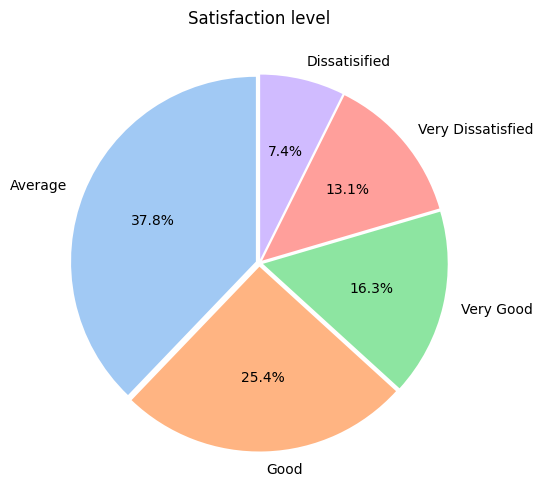

In [342]:
data = df['Satisfaction Level'].value_counts()
label = data.index

colors = sns.color_palette('pastel', len(label))

plt.figure(figsize = (8,6))
plt.pie(data, labels = label, autopct = '%1.1f%%',
        explode = [0.02] * len(label),
        startangle = 90,
        colors = colors)
plt.title('Satisfaction level')
plt.show()

## Deriving Age Feature

In [343]:
df['Birth Date'] = pd.to_datetime(df['Birth Date'], format='%Y/%m/%d')
current_date = datetime.now()
df['Age'] = current_date.year - df['Birth Date'].dt.year
df.head()

,Customer ID,Gender,Birth Date,Married,Dependents,Number of Dependents,Country,City,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Internet Service,Internet Type,Avg Monthly GB Download,Premium Tech Support,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Satisfaction Score,Satisfaction Level,Age
0,8779-QRDMV,Male,1946-07-17,No,No,0,United States,Los Angeles,0,1,0.00,Yes,DSL,8,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,0.00,3,Average,79
1,7495-OOKFY,Female,1950-11-12,Yes,Yes,1,United States,Los Angeles,1,8,48.85,Yes,Fiber Optic,17,No,No,No,Month-to-Month,Yes,Credit Card,80.65,0.00,3,Average,75
2,1658-BYGOY,Male,1953-03-21,No,Yes,3,United States,Los Angeles,0,18,11.33,Yes,Fiber Optic,52,No,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,45.61,2,Dissatisified,72
3,4598-XLKNJ,Female,1946-03-08,Yes,Yes,1,United States,Inglewood,1,25,19.76,Yes,Fiber Optic,12,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.50,13.43,2,Dissatisified,79
4,4846-WHAFZ,Female,1944-04-02,Yes,Yes,1,United States,Whittier,1,37,6.33,Yes,Fiber Optic,14,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,0.00,2,Dissatisified,81


## Feature Selection

In [344]:
df_satisfaction = df[['Gender','Age','Tenure in Months', 'Avg Monthly Long Distance Charges', 'Contract', 'Monthly Charge','Total Refunds','Satisfaction Score' ]]
df_satisfaction

,Gender,Age,Tenure in Months,Avg Monthly Long Distance Charges,Contract,Monthly Charge,Total Refunds,Satisfaction Score
0,Male,79,1,0.00,Month-to-Month,39.65,0.00,3
1,Female,75,8,48.85,Month-to-Month,80.65,0.00,3
2,Male,72,18,11.33,Month-to-Month,95.45,45.61,2
3,Female,79,25,19.76,Month-to-Month,98.50,13.43,2
4,Female,81,37,6.33,Month-to-Month,76.50,0.00,2
...,...,...,...,...,...,...,...,...
7038,Female,31,72,22.77,Two Year,21.15,19.31,5
7039,Male,39,24,36.05,One Year,84.80,48.23,3
7040,Female,31,72,29.66,One Year,103.20,45.38,4
7041,Female,33,11,0.00,Month-to-Month,29.60,27.24,4


In [345]:
df_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int32  
 2   Tenure in Months                   7043 non-null   int64  
 3   Avg Monthly Long Distance Charges  7043 non-null   float64
 4   Contract                           7043 non-null   object 
 5   Monthly Charge                     7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Satisfaction Score                 7043 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 412.8+ KB


## Checking outliers

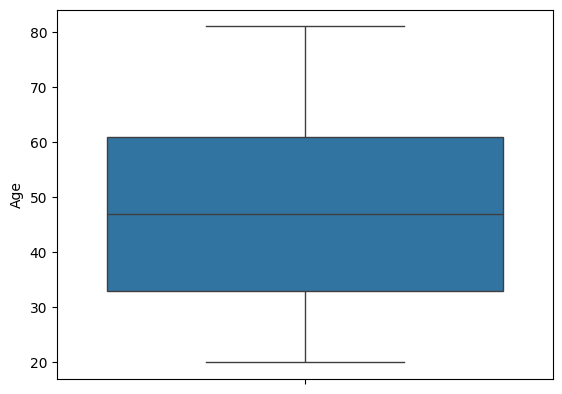

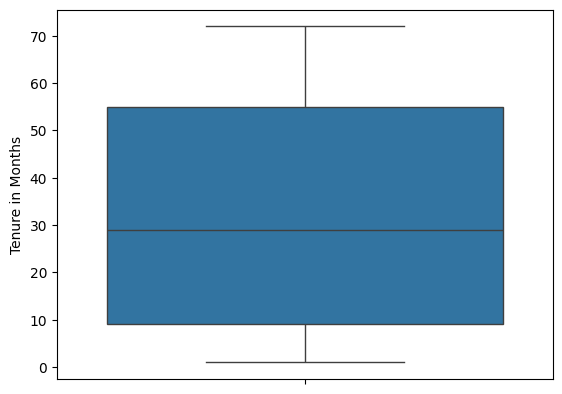

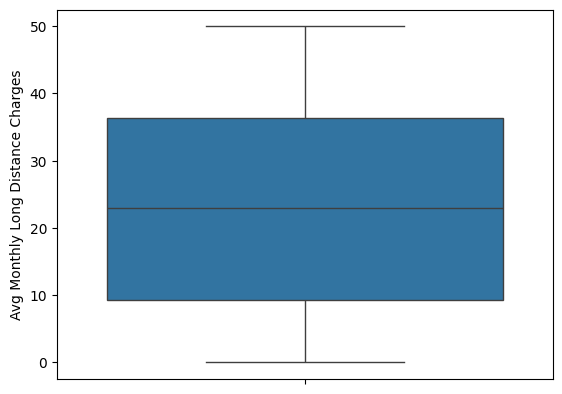

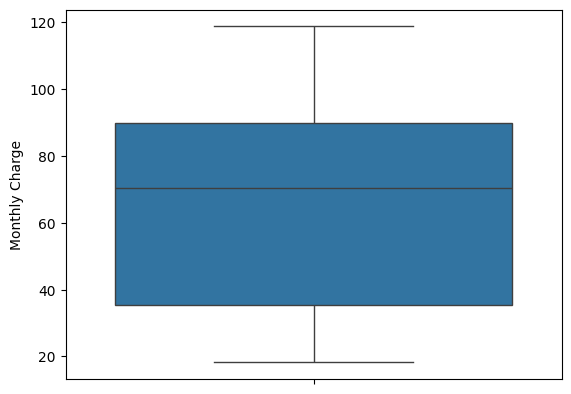

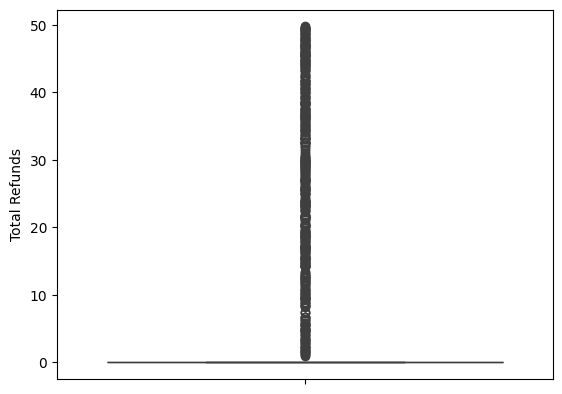

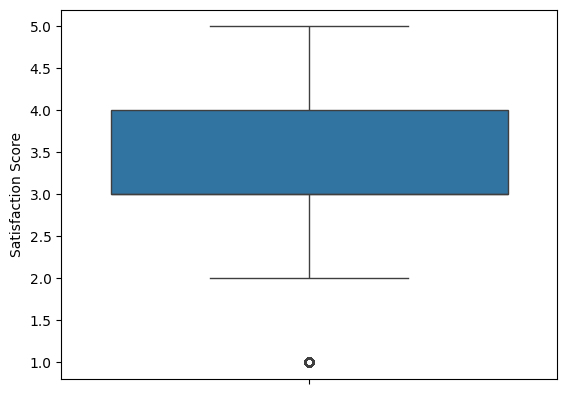

In [346]:
int_cols = df_satisfaction.select_dtypes(include = 'number')
int_cols = list(int_cols)

def box_plot(df, col):
    sns.boxplot(df[col])
    plt.show()

for cols in int_cols:
  box_plot(df_satisfaction, cols)

## Satisfaction Scores based on Gender

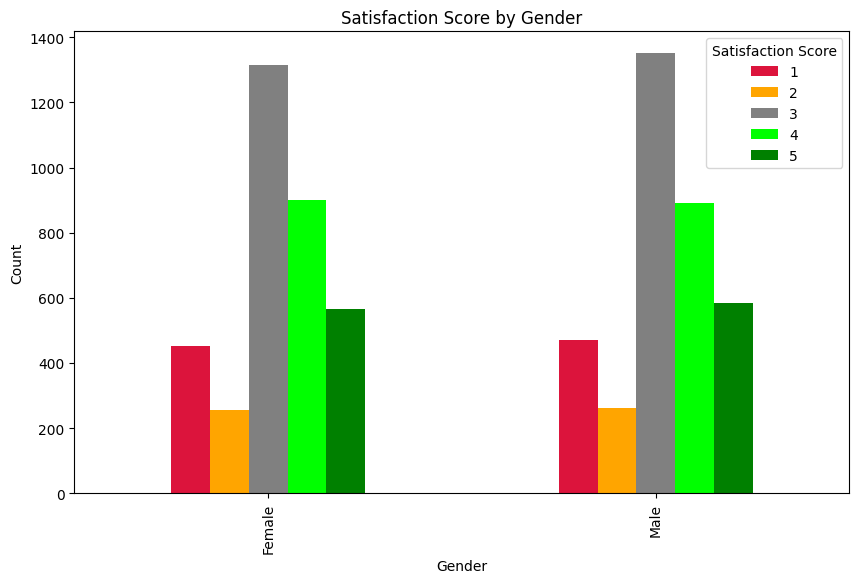

In [347]:
grouped_data = df.groupby(['Gender', 'Satisfaction Score']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6), color=['Crimson', 'orange', 'gray', 'lime', 'green'])

plt.title('Satisfaction Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Corrplot

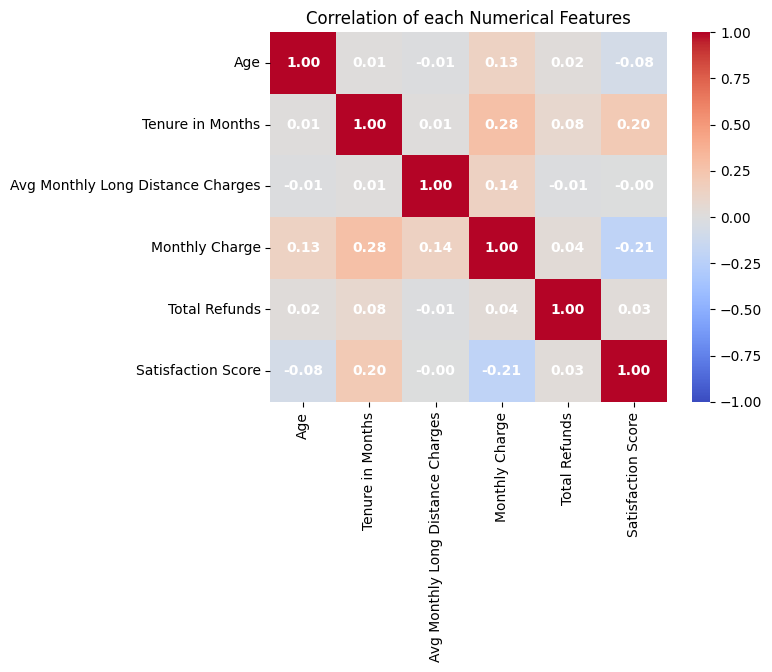

In [348]:
num_cols = df_satisfaction.select_dtypes(include = 'number')
correlation = num_cols.corr(method = 'spearman')
sns.heatmap(correlation, annot = True,
            cmap='coolwarm',
            fmt = '.2f',center = 0, vmin = -1,
            annot_kws = {'size': 10, 'weight':'bold', 'color':'white'})
plt.title('Correlation of each Numerical Features')
plt.show()

## Scaling & Encoding

In [349]:
bins = [0, 0.000001, df['Total Refunds'].max()]
labels = ['No Refund', 'Refunded']
df_satisfaction['Refund'] = pd.cut(df_satisfaction['Total Refunds'], bins=bins, labels=labels, right=False)

In [350]:
df_satisfaction.drop('Total Refunds', axis = 1, inplace = True)

In [355]:
all_int_cols = df_satisfaction.select_dtypes(include = 'number')
all_int_cols = list(all_int_cols)
object_cols = df_satisfaction.select_dtypes(include = ['object', 'category'])
object_cols = list(object_cols)

In [359]:
rob_int_cols = [x for x in all_int_cols if x == 'Satisfaction Score']
int_cols = [x for x in all_int_cols if x != 'Satisfaction Score']

In [324]:
df_unscaled = df_satisfaction.copy()

In [361]:
scaler = StandardScaler()
robust = RobustScaler()
df_satisfaction[int_cols] = scaler.fit_transform(df_satisfaction[int_cols])
df_satisfaction[rob_int_cols] = robust.fit_transform(df_satisfaction[rob_int_cols])

In [362]:
df_satisfaction = pd.get_dummies(df_satisfaction, columns= object_cols)

In [363]:
X = df_satisfaction

## PCA

In [364]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [365]:
X_pca

array([[-0.86503885, -1.28012739],
       [-1.16152029,  0.50788142],
       [-1.85459403,  0.52581612],
       ...,
       [ 1.18894625,  1.72045092],
       [ 0.66277473, -2.07287944],
       [ 1.00131232,  1.91627318]])

In [366]:
explained_variance_ratio = pca.explained_variance_ratio_

# Print the components (directions of maximum variance)
component = pca.components_
print(component)
pca_df = pd.DataFrame(component, columns=X.columns)
pca_df.index = [f'PC{i+1}' for i in range(component.shape[0])]
pca_df_sorted = pca_df.apply(lambda x: x.abs().sort_values(ascending=False).index.tolist(), axis=1)

[[-1.58495692e-01  3.57275467e-01 -3.38972455e-02 -2.40953040e-01
   8.49361727e-01 -3.53142418e-04  3.53142418e-04 -2.06361041e-01
   6.73005930e-02  1.39060448e-01 -8.91990921e-03  8.87415869e-03]
 [ 2.85657714e-01  6.17468905e-01  2.51454845e-01  6.47284666e-01
  -7.95997279e-02  1.42744550e-03 -1.42744550e-03 -1.74313154e-01
   5.20949174e-02  1.22218237e-01 -1.64880469e-02  1.66295456e-02]]


# B. K-means Modelling

## Elbow Method and Silhouette Score

In [367]:
wcss = []
silhouette_scores = []
diff = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)

    wcss.append(kmeans.inertia_)

    if i > 1:
        silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(None)

    diff.append([i, kmeans.inertia_, silhouette_scores[-1]])

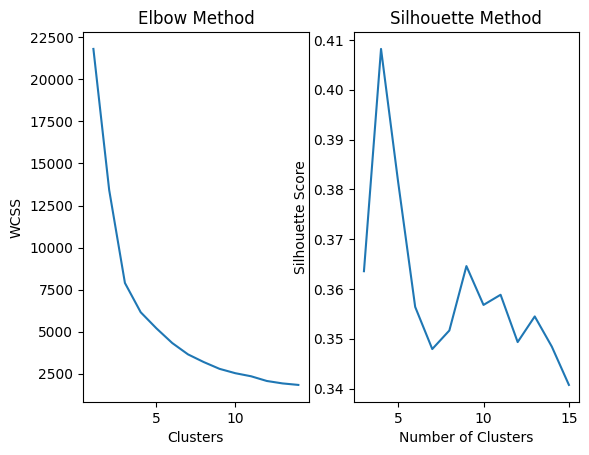

<Figure size 640x480 with 0 Axes>

In [368]:
plt.subplot(1, 2, 1)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 16), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

plt.tight_layout()
plt.show()


diff = pd.DataFrame(diff, columns = ['Cluster', 'WCSS', 'Silhouette'])

In [369]:
diff.head(10)

,Cluster,WCSS,Silhouette
0,1,21816.532712,NaN
1,2,13427.262755,0.363568
2,3,7890.179628,0.408200
3,4,6149.131013,0.381532
4,5,5188.695506,0.356400
5,6,4317.984961,0.347938
6,7,3642.618763,0.351665
7,8,3184.567246,0.364594
8,9,2781.786197,0.356798
9,10,2522.719900,0.358838


## Manual Gridsearch

In [370]:
init_methods = ['k-means++', 'random']
max_iters = [100, 200, 300, 500]

results = []

for init in init_methods:
    for max_iter in max_iters:
        kmeans = KMeans(n_clusters=3, init=init, max_iter=max_iter, random_state=42)
        silhouette_avg = silhouette_score(X_pca, kmeans.fit_predict(X_pca))
        results.append({'Init': init, 'Max Iter': max_iter, 'Silhouette': silhouette_avg})

results_df = pd.DataFrame(results)

best_results = results_df.sort_values(by='Silhouette', ascending=False).head(1)


In [371]:
best_results

,Init,Max Iter,Silhouette
0,k-means++,100,0.4082


## K-means visualization

In [372]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, init = 'k-means++', random_state = 42)
y_means = kmeans.fit(X_pca)
cluster_group = kmeans.labels_
df_unscaled['Cluster'] = cluster_group

df_unscaled['Cluster'].value_counts()

,count
Cluster,
0,2649
1,2424
2,1970


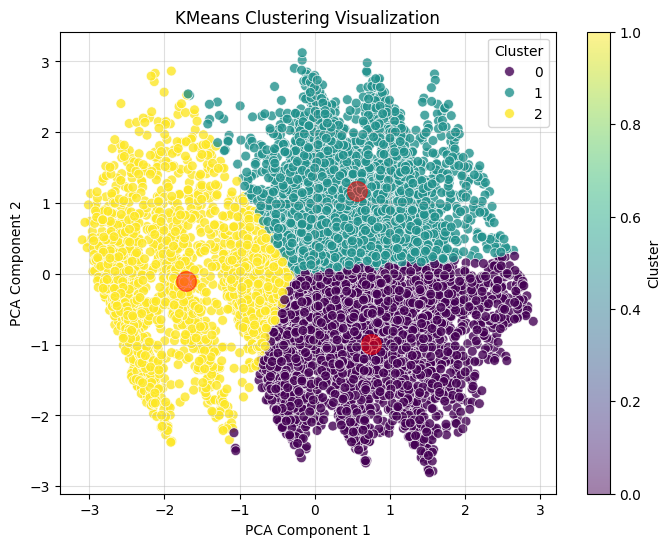

In [373]:
centroids = y_means.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = df_unscaled['Cluster'], palette='viridis', s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='o', label='Centroids', alpha=0.5)
plt.title("KMeans Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(alpha=0.4)
plt.show()

# C. Cluster Characteristic

In [378]:
numerical_mean = df_unscaled.groupby('Cluster')[all_int_cols].mean()
numerical_mean

,Age,Tenure in Months,Avg Monthly Long Distance Charges,Monthly Charge,Satisfaction Score
Cluster,,,,,
0,41.647414,24.269158,19.383771,38.391676,3.959230
1,50.870462,55.030941,26.138993,84.530507,3.617162
2,51.257360,15.439594,23.853492,75.895990,1.826396


In [383]:
cat_mean = df_unscaled.groupby('Cluster')[object_cols].agg(lambda x: x.mode()[0])
cat_mean

,Gender,Contract,Refund
Cluster,,,
0,Male,Month-to-Month,No Refund
1,Male,Two Year,No Refund
2,Female,Month-to-Month,No Refund


Dari hasil K-means diatas kita dapat melihat bahwa:
- Cluster 0 adalah pelanggan dengan  yang kurang sering berlangganan, memiliki tagihan bulanan yang lebih rendah, dan  puas dengan layanan, biasanya mengambil langganan bulanan dan tidak melakukan refund
- Cluster 1 adalah pelanggan dengan usia 31-49 yang sangat sering berlangganan dengan tagihan bulanan yang tinggi tetapi puas, biasanya mengambil langganan 2 tahun, dan tidak melakukan refund
- Cluster 2 adalah pelanggan dengan usia 50-69 yang tidak suka berlangganan, memiliki tagihan bulanan yang lumayan tinggi dan sangat tidak puas, dan biasanya mengambil langganan per bulan, dan tidak melakukan refund